In [48]:
pip install pingouin

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import pingouin as pg

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [50]:
df = pd.read_csv('results.csv')

In [51]:
mapping = {False: 1, True: 0}
df = df.replace({'correctness': mapping})

df_rt = df.groupby(['participantID', 'condition'])[['reactionTime']].mean()
df_err = df.groupby(['participantID', 'condition'])[['correctness']].mean()

<ipython-input-51-8a68e2af678a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'correctness': mapping})


In [52]:
df_err.head()

correctness
participantID condition             
1             V             0.125000
              VH            0.083333
2             V             0.416667
              VH            0.333333
3             V             0.145833

In [53]:
df_rt = df_rt.reset_index()
df_rt.head()

,participantID,condition,reactionTime
0,1,V,7.489875
1,1,VH,6.650271
2,2,V,19.074000
3,2,VH,17.403833
4,3,V,11.666312


<Axes: title={'center': 'reactionTime'}, xlabel='condition'>

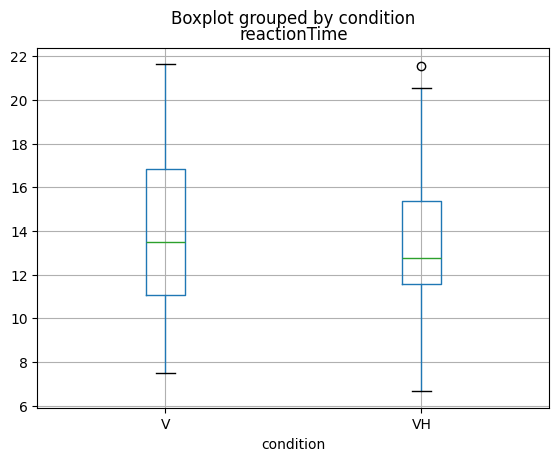

In [54]:
df_rt.boxplot(column='reactionTime', by='condition')

In [55]:
# Calculate the mean response time per condition
mean_response_times = df_rt.groupby('condition')['reactionTime'].mean()

# Output the results
print(mean_response_times)

condition
V     13.938905
VH    13.397716
Name: reactionTime, dtype: float64


In [56]:
df_rt.groupby('condition').std()

,participantID,reactionTime
condition,,
V,5.338539,4.199346
VH,5.338539,4.067120


In [57]:
pg.normality(df_rt, dv='reactionTime', group='condition', method='shapiro', alpha=0.05)

,W,pval,normal
condition,,,
V,0.955433,0.516421,True
VH,0.966604,0.731956,True


In [58]:
# Bonferroni-corrected post hoc tests
pg.pairwise_tests(data=df_rt, dv='reactionTime', within='condition', subject='participantID', parametric=True, alpha=0.05, padjust='bonf', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,condition,V,VH,True,True,2.309592,17.0,two-sided,0.033734,1.966,0.130919


<ipython-input-59-558394e70974>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x="condition", y="reactionTime", data=df_rt, palette="colorblind")


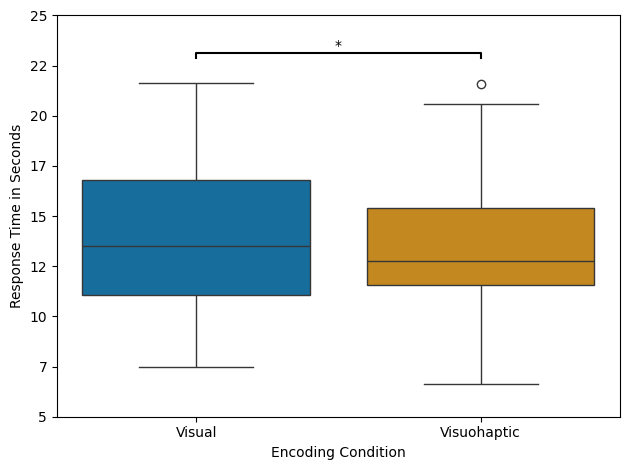

In [59]:
g = sns.boxplot(x="condition", y="reactionTime", data=df_rt, palette="colorblind")
g.set_xticks([0, 1])
g.set_xticklabels(['Visual', 'Visuohaptic'])
g.set_ylabel('Response Time in Seconds')
g.set_xlabel('Encoding Condition')

# statistical annotation for two conditions
x1, x2 = 0, 1  # Only two conditions
y, h, col = df_rt['reactionTime'].max() + 2.5, 2, 'k'

# Plotting the line and asterisk for statistical significance between x1 and x2
plt.plot([x1, x1, x2, x2], [y-1.25, y-1, y-1, y-1.25], lw=1.5, c=col)
plt.text((x1+x2)*.5, y-1, "*", ha='center', va='bottom', color=col)

plt.ylim(5, 25)
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))

plt.tight_layout()
plt.savefig('tct.pdf', format='pdf')

plt.show()

In [60]:
df_err = df_err.reset_index()
df_err.head()

,participantID,condition,correctness
0,1,V,0.125000
1,1,VH,0.083333
2,2,V,0.416667
3,2,VH,0.333333
4,3,V,0.145833


<Axes: title={'center': 'correctness'}, xlabel='condition'>

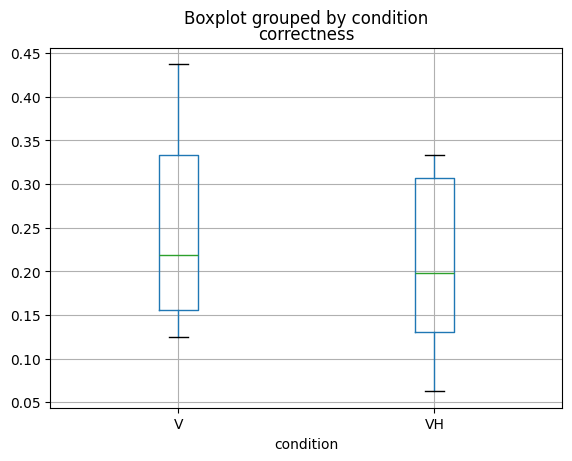

In [61]:
df_err.boxplot(column='correctness', by='condition')

In [62]:
df_err.groupby('condition').std()

,participantID,correctness
condition,,
V,5.338539,0.102284
VH,5.338539,0.095671


In [63]:
pg.normality(df_err, dv='correctness', group='condition', method='shapiro', alpha=0.05)

,W,pval,normal
condition,,,
V,0.906804,0.075581,True
VH,0.897572,0.052135,True


In [64]:
pg.pairwise_tests(data=df_err, dv='correctness', between=None, within='condition', subject='participantID', parametric=True, marginal=True, alpha=0.05, alternative='two-sided', padjust='bonf', effsize='cohen', correction='auto', nan_policy='listwise', return_desc=False, interaction=True, within_first=True)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,condition,V,VH,True,True,4.919074,17.0,two-sided,0.00013,223.667,0.479172


<ipython-input-65-45f94ce06650>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(x="condition", y="correctness", data=df_err, palette="colorblind")


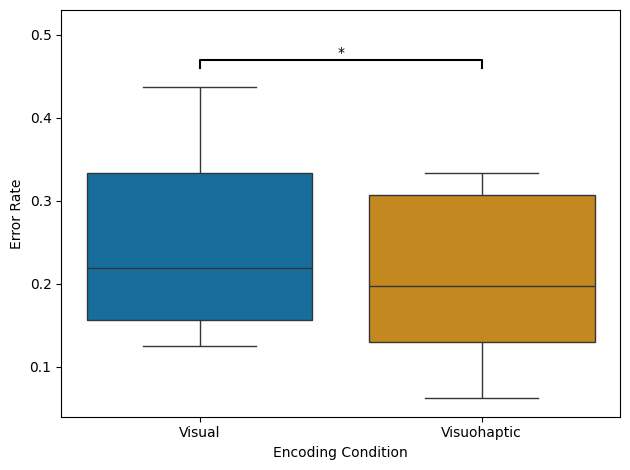

In [65]:
g = sns.boxplot(x="condition", y="correctness", data=df_err, palette="colorblind")

g.set_xticks([0, 1])
g.set_xticklabels(['Visual', 'Visuohaptic'])
g.set_ylabel('Error Rate')
g.set_xlabel('Encoding Condition')

# statistical annotation for two conditions
x1, x2 = 0, 1  # Only two conditions
y, h, col = df_err['correctness'].max() + 1.25, 2, 'k'

# Plotting the line and asterisk for statistical significance between x1 and x2
plt.plot([x1, x1, x2, x2], [0.46, 0.47, 0.47, 0.46], lw=1.5, c=col)
plt.text((x1+x2)*.5, 0.47, "*", ha='center', va='bottom', color=col)

plt.ylim(0.04, 0.53)

plt.tight_layout()

plt.savefig('num_errors.pdf', format='pdf')

plt.show()

In [66]:
# Summarize correctness and reaction time by condition
summary_by_condition = df.groupby('condition').agg(
    correct=('correctness', 'sum'),
    total=('correctness', 'count'),
    mean_reaction_time=('reactionTime', 'mean'),
    std_reaction_time=('reactionTime', 'std')
)

# Calculate the proportion of correct responses
summary_by_condition['proportion_correct'] = summary_by_condition['correct'] / summary_by_condition['total']

summary_by_condition


,correct,total,mean_reaction_time,std_reaction_time,proportion_correct
condition,,,,,
V,218,864,13.938905,6.078501,0.252315
VH,177,864,13.397716,5.934034,0.204861
